# PGA 43 : SIMRAN 
# COURSE : PGA43:DATA SCIENCE AND ANALYSIS 
# CAPSTONE PROJECT 2 
## ON MACHINE LEARNING 


# TOPIC: CLASSIFICATION PROBLEM OF A AIRLINE CUSTOMER SATISFACTION 

# Importing important Libraries 

In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# importing model_selection 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
# importing Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
! pip install xgboost
import xgboost as xgb

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # for feature selection 
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report
# report from our  model performance and prediction 



DATA EXPLORATION AND CLEANING 

In [2]:
# importing the data i have to read with my operating system 
import os 
os.getcwd()
os.chdir('C:\imcoco')

In [28]:
data= pd.read_csv("C:\imcoco\Airline_customer_satisfaction.csv")
data.head(2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


In [81]:
data.shape  
# there are  129880 rows and 22 columns 

(129880, 22)

In [5]:
data.info()  # to see count , datatype , number of null values in data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

##### Most of the columns of dataset are in integer and numeric values 

In [59]:
data.describe() # to see the discription of the data set 

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000,129587.000000
mean,39.438215,1973.530061,2.838965,2.990863,2.852153,2.990670,3.248706,3.383233,3.519659,3.472223,3.465718,3.485982,3.695718,3.340705,3.706537,3.352180,14.374559
std,15.120641,1013.420851,1.393129,1.527378,1.443765,1.305791,1.318780,1.346129,1.306573,1.305776,1.270672,1.292293,1.156422,1.260532,1.151380,1.298714,35.255195
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1358.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1922.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,2538.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,5500.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,499.000000


##### Dataset brief 

In [7]:
data.describe(include = 'object') # to see description of only non numerical columns 

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


##### All columns with the object types 

In [29]:
# for the unique values in object type columns
for x in data.describe(include='object').columns:
    print('Column Name: ',x,"-"*2 ,'values_contain :',data[x].unique())
    print("```"*50)
    

Column Name:  satisfaction -- values_contain : ['satisfied' 'dissatisfied']
``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
Column Name:  Customer Type -- values_contain : ['Loyal Customer' 'disloyal Customer']
``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
Column Name:  Type of Travel -- values_contain : ['Personal Travel' 'Business travel']
``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
Column Name:  Class -- values_contain : ['Eco' 'Business' 'Eco Plus']
``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````


In [9]:
data.head(2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


### Missing value treatment 

In [83]:
data.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

##### only Arrival Delay in Minutes have missing values 

In [30]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(), inplace=True)

In [12]:
# after will the missing value with mean , there is no missing value in dataframe 
data.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Outliers  Treatmeant

In [13]:
columns=data.columns 
columns # making a list with name of all the columns 

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

##### for outliers we can see it with the box plot as well as scatter plot 

In [31]:
def setting_size (width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

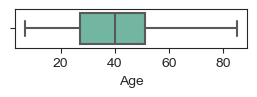

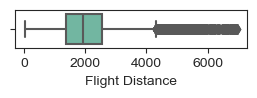

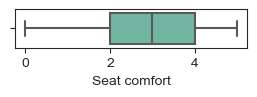

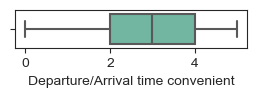

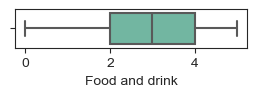

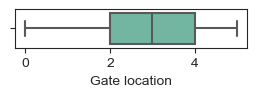

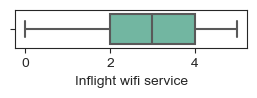

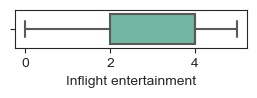

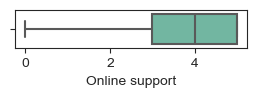

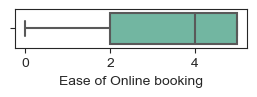

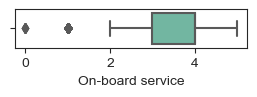

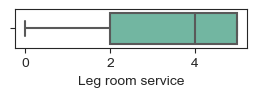

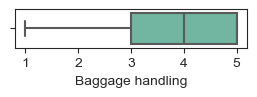

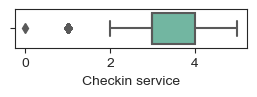

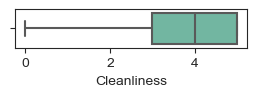

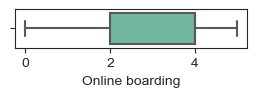

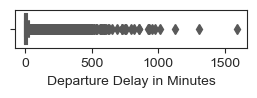

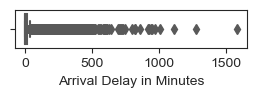

In [32]:
for  x in data.describe().columns:
    setting_size(3,.5,'ticks')
    sns.boxplot(data=data,x=x,palette='Set2')
    plt.show()

In [33]:
data= data.drop(data[data['Departure Delay in Minutes'] > 500 ].index)
data=data.drop(data[data['Arrival Delay in Minutes'] > 500 ].index)
data=data.drop(data[data['Flight Distance'] > 5500 ].index)
data.reset_index(drop=True, inplace=True)
data.shape


(129587, 22)

##### Outliers removal from the data framme 

# Exploratory Data Analysis

In [17]:
data.head(2)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


##### Now our dataframe do not have any missing value and there are very less outliers in the data set ,so we can perform EDA now.

# In EDA  
##### we check Distributaion ,share ,plot and other visulations of data frame 

Text(0.5, 1.0, 'Age Distribution')

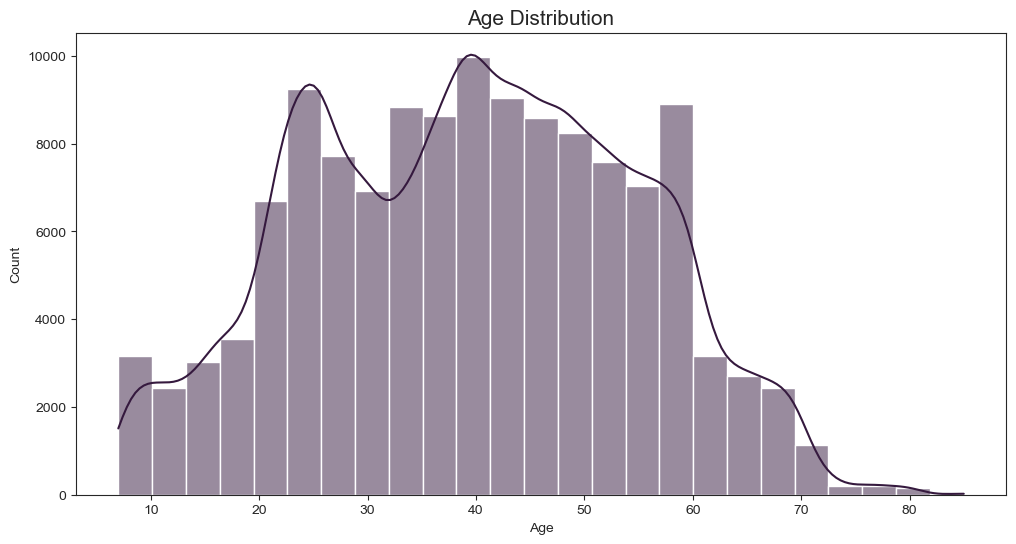

In [34]:
setting_size(12,6,None)
ax = sns.histplot(data['Age'],bins=25,color= sns.color_palette("rocket")[0],kde=True)
(ax,'Age Distribution','Age','Frequency',13,10)
ax.set_title('Age Distribution', fontsize=15) 

In [ ]:
##### 20 to 60 years is the age range to which majority of Airline custormers 

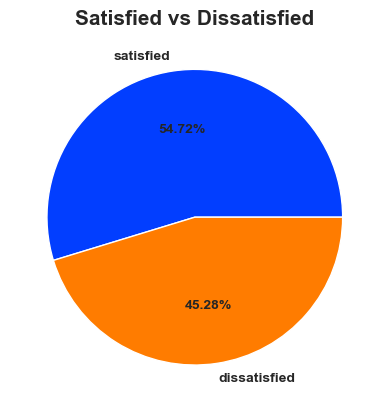

In [102]:
plt.title("Satisfied vs Dissatisfied", fontsize = 15, weight='bold')
plt.pie(data['satisfaction'].value_counts(),labels=data['satisfaction'].value_counts().index,radius=1, autopct='%.2f%%',textprops={'fontsize': 10, 'fontweight': 'bold'}, colors = sns.color_palette('bright'))
plt.show()

Text(0.5, 1.0, 'Correlation among numerical columns')

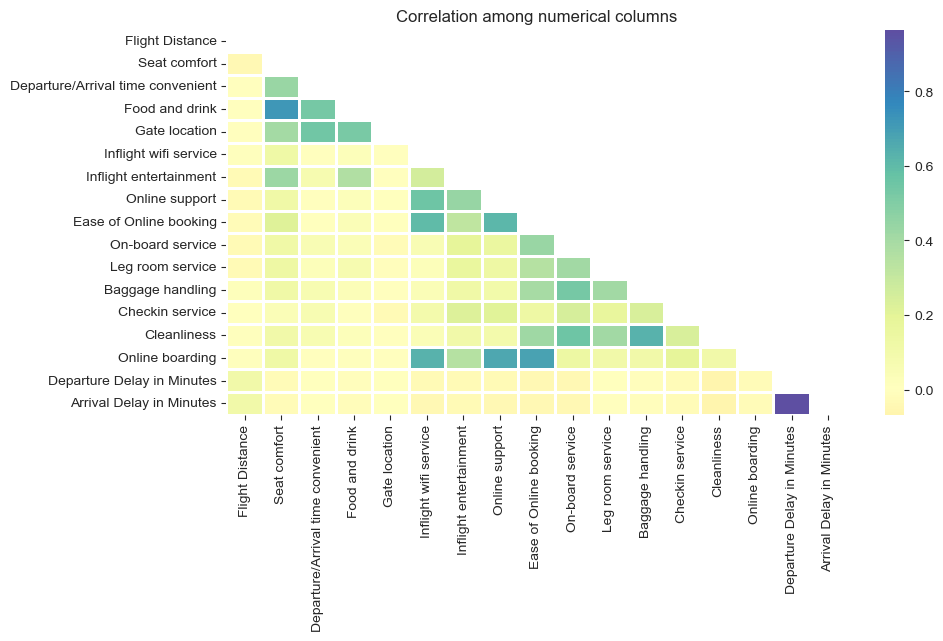

In [11]:
corr = data[['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,5))
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt="%",cmap = 'Spectral')
plt.title("Correlation among numerical columns")

In [ ]:
##### Arrival Delay in minutes have high corelation with Departure Delay in Minutes. So we will drop that column 

In [142]:
data.drop(columns = ['Arrival Delay in Minutes'],inplace = True)

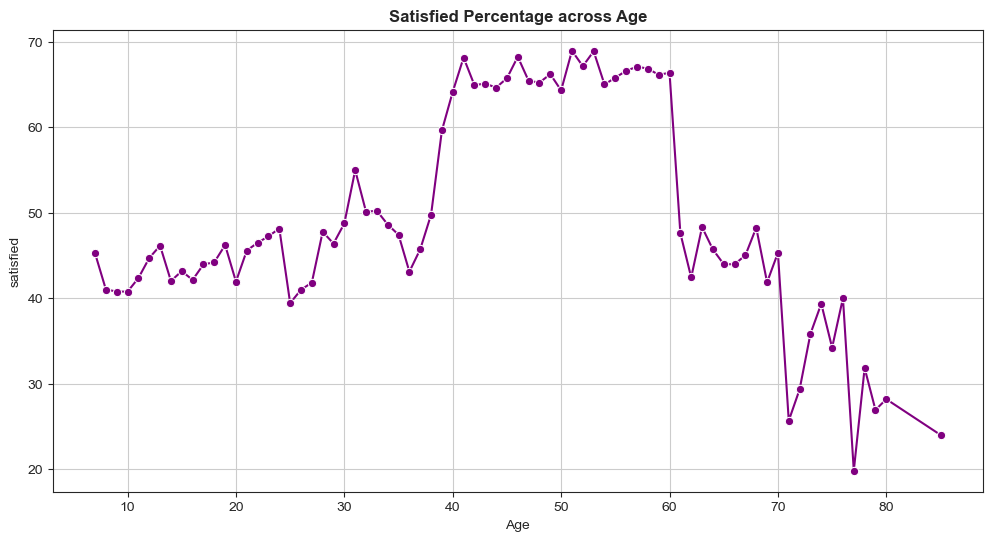

In [35]:
# Assuming set_size_style is custom function to set the figure size
setting_size(12, 6)

# Group by 'Age' and calculate the percentage of 'satisfied' customers within each age group
age_groups = data.groupby('Age')['satisfaction'].value_counts(normalize=True).unstack()
satisfied_percentage = age_groups['satisfied'] * 100  # Already calculating as a percentage

# Create the line plot
ax = sns.lineplot(x=satisfied_percentage.index, y=satisfied_percentage, 
                  marker='o', color='purple')  

# Customize the plot (assuming customize_plot is your custom function)
plt.title('Satisfied Percentage across Age', fontsize=12, weight='semibold')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

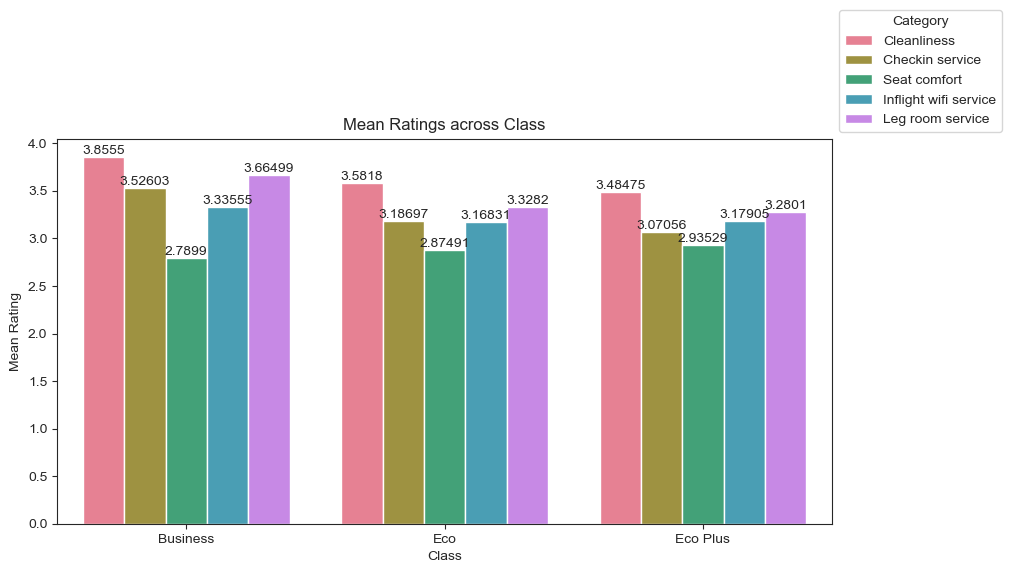

In [12]:
setting_size(10,5)
ratings = data.groupby('Class').agg({'Cleanliness':'mean',
                                                       'Checkin service' : 'mean',
                                                       'Seat comfort':'mean',
                                                       'Inflight wifi service':'mean', 
                                                       'Leg room service':'mean'}).reset_index()
melted_class_rating = pd.melt(ratings, id_vars='Class', var_name='Category', value_name='Mean Rating')
ax = sns.barplot(x='Class', y='Mean Rating', hue='Category', data=melted_class_rating, palette="husl")
plt.title('Mean Ratings across Class')
for c in ax.containers:
        ax.bar_label(c)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Category', bbox_to_anchor=(1, 1), loc='lower left')

# Categorical Feature Conversion

In [36]:
dummies=pd.get_dummies(data['Class'], dtype=int)
dummies

,Business,Eco,Eco Plus
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
129582,0,1,0
129583,1,0,0
129584,0,1,0
129585,0,1,0


In [37]:
data_encoded = pd.concat([data,dummies], axis = 'columns')
data_encoded.drop(columns = ['Class'], inplace=True)
data_encoded

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
0,satisfied,Loyal Customer,65,Personal Travel,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,Loyal Customer,47,Personal Travel,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,Loyal Customer,15,Personal Travel,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,Loyal Customer,60,Personal Travel,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,Loyal Customer,70,Personal Travel,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,satisfied,disloyal Customer,29,Personal Travel,1731,5,5,5,3,2,...,3,4,4,4,2,0,0.0,0,1,0
129583,dissatisfied,disloyal Customer,63,Personal Travel,2087,2,3,2,4,2,...,3,3,1,2,1,174,172.0,1,0,0
129584,dissatisfied,disloyal Customer,69,Personal Travel,2320,3,0,3,3,3,...,3,4,2,3,2,155,163.0,0,1,0
129585,dissatisfied,disloyal Customer,66,Personal Travel,2450,3,2,3,2,3,...,2,3,2,1,2,193,205.0,0,1,0


In [38]:
data_encoded['Customer Type'] = data_encoded['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
data_encoded['Type of Travel'] = data_encoded['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
data_encoded['satisfaction'] = data_encoded['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

data_encoded

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
0,1,1,65,1,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,0,1,0
1,1,1,47,1,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,1,0,0
2,1,1,15,1,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,0,1,0
3,1,1,60,1,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,0,1,0
4,1,1,70,1,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,1,0,29,1,1731,5,5,5,3,2,...,3,4,4,4,2,0,0.0,0,1,0
129583,0,0,63,1,2087,2,3,2,4,2,...,3,3,1,2,1,174,172.0,1,0,0
129584,0,0,69,1,2320,3,0,3,3,3,...,3,4,2,3,2,155,163.0,0,1,0
129585,0,0,66,1,2450,3,2,3,2,3,...,2,3,2,1,2,193,205.0,0,1,0


# Splitting the Data 

In [39]:
X = data_encoded.drop(columns = ['satisfaction'])
y = data_encoded['satisfaction']

In [40]:
X.shape, y.shape

((129587, 23), (129587,))

In [41]:
X

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
0,1,65,1,265,0,0,0,2,2,4,...,0,3,5,3,2,0,0.0,0,1,0
1,1,47,1,2464,0,0,0,3,0,2,...,4,4,2,3,2,310,305.0,1,0,0
2,1,15,1,2138,0,0,0,3,2,0,...,3,4,4,4,2,0,0.0,0,1,0
3,1,60,1,623,0,0,0,3,3,4,...,0,1,4,1,3,0,0.0,0,1,0
4,1,70,1,354,0,0,0,3,4,3,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129582,0,29,1,1731,5,5,5,3,2,5,...,3,4,4,4,2,0,0.0,0,1,0
129583,0,63,1,2087,2,3,2,4,2,1,...,3,3,1,2,1,174,172.0,1,0,0
129584,0,69,1,2320,3,0,3,3,3,2,...,3,4,2,3,2,155,163.0,0,1,0
129585,0,66,1,2450,3,2,3,2,3,2,...,2,3,2,1,2,193,205.0,0,1,0


In [42]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129582    1
129583    0
129584    0
129585    0
129586    0
Name: satisfaction, Length: 129587, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((103669, 23), (103669,))

# Standardization with standradscaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # data tranformation

# Selecting the best method :
## Kneighbors Classifier,Logistic regression,Random Forest Classifier,Decision Tree Classifier

CV Score (Mean) K-Nearest Neighbors: 0.9180082725811682
CV Score (Mean) Logistic Regression: 0.8295054295975
CV Score (Mean) Random Forest Classifier: 0.954538011617319
CV Score (Mean) Decision Tree Classifier: 0.9337217427634174


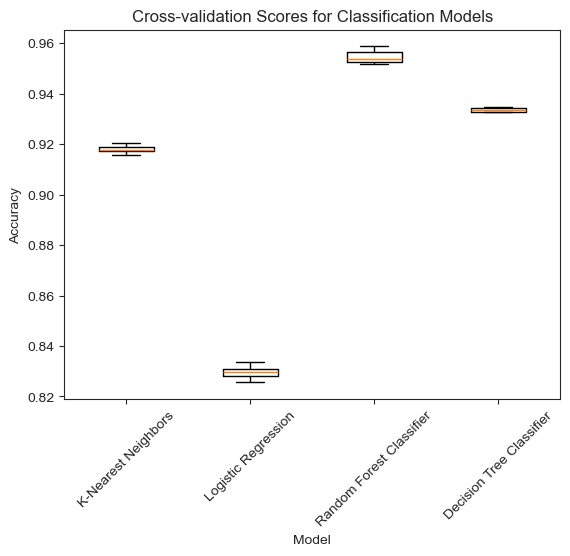

In [154]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
}
results = []

for name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    print(f'CV Score (Mean) {name}: {np.mean(cv_results)}')
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.title('Cross-validation Scores for Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [46]:
rf = RandomForestClassifier(random_state=88)

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=88)

In [46]:
y_pred= rf.predict(X_test)

<Figure size 400x200 with 0 Axes>

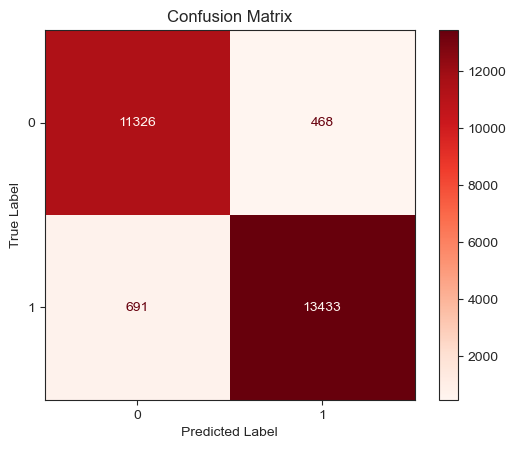

In [48]:
plt.figure(figsize=(4,2))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11794
           1       0.97      0.95      0.96     14124

    accuracy                           0.96     25918
   macro avg       0.95      0.96      0.96     25918
weighted avg       0.96      0.96      0.96     25918



In [49]:
customer_dmatrix = xgb.DMatrix(data=X_train_scaled,label=y_train)
params={'binary':'logistic'}
cv_results = xgb.cv(dtrain=customer_dmatrix,
                    params=params,
                    nfold=4,
                    metrics="error",
                    as_pandas=True,
                    seed=42)

In [50]:
cv_results['test-accuracy-mean'] = 1 - cv_results['test-error-mean']
mean_accuracy = cv_results['test-accuracy-mean'].iloc[-1]
print("Mean Accuracy (CV):", mean_accuracy)

Mean Accuracy (CV): 0.9255901202656526


# Hyperparameter Tuning 

### RandomSearch CV 

In [52]:
xgb_param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01), 
    'n_estimators': [200],
    'subsample': np.arange(0.3, 1.0, 0.1), 
    'max_depth': np.arange(3, 10, 1), 
    'colsample_bytree': np.arange(0.3, 1.0, 0.1) 
}
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
random_xgboost = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=xgb_param_grid,
    n_iter=15, 
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42
)

random_xgboost.fit(X_train_scaled, y_train)
print("Best parameters found:", random_xgboost.best_params_)
print("Best Accuracy Score:", random_xgboost.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters found: {'subsample': 0.7000000000000002, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.11, 'colsample_bytree': 0.8000000000000003}
Best Accuracy Score: 0.9562260721563337


# Grid Search CV

In [51]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [200],
    'max'
    'subsample': [0.3, 0.5, 0.9]
}
xgboost_model = xgb.XGBClassifier(objective = 'binary:logistic',seed=42)
grid_xgboost = GridSearchCV(
    estimator=xgboost_model,
    param_grid=xgb_param_grid,
    scoring='accuracy',
    cv=4,
    verbose=1
)
grid_xgboost.fit(X_train_scaled, y_train)
print("Best parameters found:", grid_xgboost.best_params_)
print("Best Accuracy Score:", grid_xgboost.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best parameters found: {'learning_rate': 0.5, 'maxsubsample': 0.3, 'n_estimators': 200}
Best Accuracy Score: 0.9540846358547117


In [53]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic',
                              subsample= 0.7,
                              n_estimators= 200,
                              max_depth = 9,
                              learning_rate = 0.11,
                              colsample_bytree=0.8)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred = xgb_model.predict(X_test_scaled)

# Model Evalulation

<Figure size 800x600 with 0 Axes>

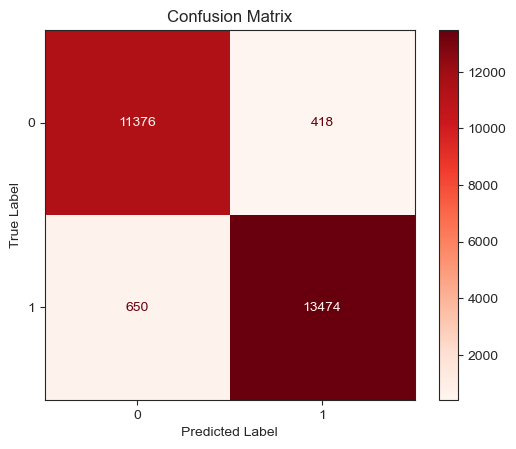

In [55]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test, cmap='Reds', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11794
           1       0.97      0.95      0.96     14124

    accuracy                           0.96     25918
   macro avg       0.96      0.96      0.96     25918
weighted avg       0.96      0.96      0.96     25918



# Conclusion 
"""1.Both Random Forest and XGBoost models exhibit comparable performance metrics, including accuracy, precision, recall, and F1-score.
2.However, the XGBoost model demonstrates a slightly lower number of false positives and false negatives compared to the Random Forest model.
3.This suggests that the XGBoost model outperforms the Random Forest model slightly in terms of minimizing classification errors"""

In [ ]:
# thank you 